<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2012%EC%9D%BC/12%EC%9B%94_12%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree(결정 트리)
- Root Node(시작), Intermediate Node(중간), Terminal/Leaf Noed(끝)
- Entropy, 정보 획득

# KNN(K-Nearest Neightbor)
- k = hyperparameter
- 최단거리 찾아서 분류하는 알고리즘
- 유클리드 거리
  -> root[(x2-x1)^2 + (y2-y1)^2]

In [ ]:
# result_ori -> 엔트로피 구하는 공식
# np.log2() -> 주어진 값의 이진 로그를 계산하여 반환
import numpy as np
result_ori = -(10/16 * np.log2(10/16)) - (6/16*np.log2(6/16))
result_ori

0.954434002924965

In [ ]:
# R1 영역
r1 = (8/16) * -((7/8)*np.log2(7/8) + (1/8)*np.log2(1/8))

# R2 영역
r2 = (8/16) * -((5/8)*np.log2(5/8) + (3/8)*np.log2(3/8))

result = r1 + r2
result

0.7489992230622807

In [ ]:
# 따라서 정보 획득량은!
# 전체 entropy - 분기 후 entropy
result_ori - result

0.20543477986268432

In [ ]:
# 전체 entropy - [yes 9, no 5]
result = -((9/14)*np.log2(9/14) + (5/14)*np.log2(5/14))
result

0.9402859586706311

In [ ]:
# root node를 wind로 분류해서 entropy 계산
# weak -> [yes 6, no 2]
# strong -> [yes 3, no 3]

result_wind_weak = (8/14) * -((6/8)*np.log2(6/8) + (2/8)*np.log2(2/8))

result_wind_strong = (6/14) * -((3/6)*np.log2(3/6) + (3/6)*np.log2(3/6))

result_wind = result_wind_weak + result_wind_strong
result_wind

0.8921589282623617

In [ ]:
# sunny -> [yes 2 no 3]
# overcast -> [yes 4 no 0]
# rain -> [yes 3 no 2]
result_outlook_sunny = 5/14 * (-2/5 * np.log2(2/5) - 3/5 * np.log2(3/5))
result_outlook_overcast = 4/14 * (-4/4 * np.log2(4/4))
result_outlook_rain = 5/14 * (-3/5 * np.log2(3/5) - 2/5 * np.log2(2/5))

result_outlook = result_outlook_sunny + result_outlook_overcast + result_outlook_rain
result_outlook

0.6935361388961918

In [ ]:
# humidity
# high -> [yes 3 no 4]
# normal -> [yes 6 no 1]
result_humidity_high = 7/14 * (-3/7 * np.log2(3/7) - 4/7 * np.log2(4/7))
result_humidity_normal = 7/14 * (-6/7 *np.log2(6/7) - 1/7 * np.log2(1/7))
result_humidity = result_humidity_high + result_humidity_normal
result_humidity

0.7884504573082896

In [ ]:
# 전체 데이터를 wind로 분류했을때 우리가 얻을 수 있는 정보량
print(result - result_wind)

# 전체 데이터를 outlook으로 분류했을때 우리가 얻을 수 있는 정보량
print(result - result_outlook)

# 전체 데이터를 humidity로 분류했을때 우리가 얻을 수 있는 정보량
print(result - result_humidity)


0.04812703040826949
0.24674981977443933
0.15183550136234159


In [ ]:
# 위와 같은 Decision Tree를 사용하려면 어떻게 해야하나요?
# sklearn을 이용해서 사용하면 되요!

# iris 예제를 이용하여 Decision Tree를 구현해 보아요
# feature는 2개만 사용할 거에요!(꽃받침의 길이, 꽃잎의 길이)

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Raw Data Loading
iris = load_iris()

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 중복 데이터 정리
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop(['sepal_width', 'petal_width','target'],axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)


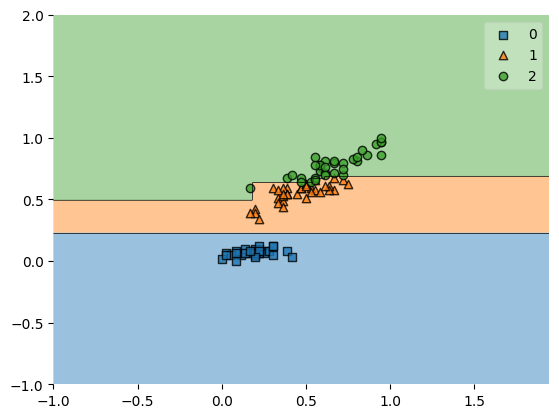

0.9555555555555556

In [ ]:
# 모델 생성
model = DecisionTreeClassifier()

model.fit(x_data_train_norm,
          t_data_train)

# Evaiuation
score = accuracy_score(t_data_test, model.predict(x_data_test_norm))

# 시각화
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()
score

In [ ]:
# 우리가 진행했던 데이터 중 MNIST 데이터가 있어요
# 이걸 사용해서 다중분류작업을 수행해볼 예정이에요
# 3가지로 구현할 예정!

# 1. Regression을 이용해서 구현(tensorflow, sklearn 사용)
# 2. SVM 사용해서 구현(sklearn 사용) -GridSearchCV
# 3. DecisionTree 이용해서 구현

# 각 모델의 정확도는 어떻게 되는지 알아보아요!

In [ ]:
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df

# 데이터셋 분리
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [ ]:
# tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=100,
                batch_size=100,
                verbose=1,
                validation_split=0.3)

keras_model.evaluate(x_data_test_norm,
                     t_data_test)


Epoch 1/100
206/206 [==============================] - 3s 11ms/step - loss: 0.4295 - acc: 0.8732 - val_loss: 0.3273 - val_acc: 0.9046
Epoch 2/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2936 - acc: 0.9148 - val_loss: 0.3027 - val_acc: 0.9161
Epoch 3/100
206/206 [==============================] - 1s 4ms/step - loss: 0.2753 - acc: 0.9191 - val_loss: 0.3013 - val_acc: 0.9185
Epoch 4/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2580 - acc: 0.9250 - val_loss: 0.2930 - val_acc: 0.9170
Epoch 5/100
206/206 [==============================] - 1s 4ms/step - loss: 0.2514 - acc: 0.9255 - val_loss: 0.3025 - val_acc: 0.9170
Epoch 6/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2442 - acc: 0.9287 - val_loss: 0.3378 - val_acc: 0.9073
Epoch 7/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2395 - acc: 0.9291 - val_loss: 0.3008 - val_acc: 0.9179
Epoch 8/100
206/206 [==============================] - 1s 3ms/step -

[0.5596413016319275, 0.8942063450813293]

In [ ]:
# sklearn 구현
sklearn_model = LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)
accuracy_score(t_data_test,
               sklearn_model.predict(x_data_test_norm))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9154761904761904

In [ ]:
# SVC 구현
svm_model = SVC()
svm_model.fit(x_data_train_norm,
              t_data_train)
accuracy_score(t_data_test,svm_model.predict(x_data_test_norm))

0.9737301587301588

In [ ]:
# Decision Tree 구현
model = DecisionTreeClassifier()

model.fit(x_data_train_norm,
          t_data_train)

accuracy_score(t_data_test, model.predict(x_data_test_norm))


0.8530952380952381

In [ ]:
# KNN 이용한 구현
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_data_train_norm,
              t_data_train)

accuracy_score(t_data_test, knn_model.predict(x_data_test_norm))

0.9644444444444444